# Analysis of Aircraft Risks for Business Expansion

## Overview

With this analysis, we aim to identify the lowest risk aircraft to support safe and strategic entry into the aviation industry.

## Business Understanding

Our company is interested in purchasing and operating airplanes for commercial and private enterprises, but has little knowledge on the potential risks of aircrafts. 

To support this initiative, we are charged with determining which aircraft present the lowest risk to start this new business endeavor. Understanding these risks will help the company lower costs and losses while prioritizing high quality service and maximizing profitability.

We will achieve this goal by analyzing data from the National Transportation Safety Board which includes detailed records of civil aviation accidents and selected incidents from 1962 to 2023, both within the United States and in international waters. 

This will help us provide the company with profitable insights on which aircrafts to purchase in order to achieve a successful expansion.

In [1]:
# Here we import the python libraries we will use for this analysis along with the aforementioned data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data/aviation_data.csv', low_memory=False)

## Data Understanding

In [2]:
#Here we look at the dataset in order to have an idea of what's in it
#We will also decide which parts of it we'll use and which ones we'll drop

#Overview of the dataset
df.info()
df.head()    

#Missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values per column:\n", missing_values)

#Check value counts
print("\nTop 10 aircraft makes:\n", df['Make'].value_counts().head(10))
print("\nTop 10 aircraft models:\n", df['Model'].value_counts().head(10))
print("\nTop 10 countries:\n", df['Country'].value_counts().head(10))

#Descriptive statistics
df.describe()
            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Now that we’ve had a good sense of what’s in the dataset, we noticed that some columns have a lot of missing values and probably won’t be useful for our analysis. But others, like the aircraft make, model, and injury related fields are more complete and will be helpful. We also determined which makes and models show up the most which will be useful later on. Next, we’ll start cleaning the data to get it ready for analysis

## Data Preparation

In [3]:
#Now we select only the relevant columns for the analysis
relevant_columns = [
    'Event.Date','Country','Make','Model','Aircraft.damage','Injury.Severity','Purpose.of.flight',
    'Weather.Condition','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured'
]

#Keep only relevant columns
df = df[relevant_columns]
#Convert date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
#Remove rows where Make, Model, Injury Severity, or Aircraft Damage are missing
df.dropna(subset=['Make', 'Model', 'Injury.Severity', 'Aircraft.damage'], inplace=True)
#Dropping incomplete rows
counting = [
    'Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured'
]
df.dropna(subset=counting, inplace=True)
#Remove duplicates
df.drop_duplicates(inplace=True)
#Make data uniform
columns_to_change = [
    'Weather.Condition','Purpose.of.flight','Injury.Severity','Aircraft.damage',
    'Make','Model','Country'
]

for col in columns_to_change:
    df[col] = df[col].astype(str).str.strip().str.lower()

df

,Event.Date,Country,Make,Model,Aircraft.damage,Injury.Severity,Purpose.of.flight,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,1948-10-24,united states,stinson,108-3,destroyed,fatal(2),personal,unk,2.0,0.0,0.0,0.0
1,1962-07-19,united states,piper,pa24-180,destroyed,fatal(4),personal,unk,4.0,0.0,0.0,0.0
3,1977-06-19,united states,rockwell,112,destroyed,fatal(2),personal,imc,2.0,0.0,0.0,0.0
6,1981-08-01,united states,cessna,180,destroyed,fatal(4),personal,imc,4.0,0.0,0.0,0.0
7,1982-01-01,united states,cessna,140,substantial,non-fatal,personal,vmc,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
90328,2022-12-13,united states,piper,pa42,substantial,non-fatal,nan,nan,0.0,0.0,0.0,1.0
90332,2022-12-14,united states,cirrus design corp,sr22,substantial,non-fatal,personal,vmc,0.0,0.0,0.0,1.0
90335,2022-12-15,united states,swearingen,sa226tc,substantial,non-fatal,nan,nan,0.0,0.0,0.0,1.0
90336,2022-12-16,united states,cessna,r172k,substantial,minor,personal,vmc,0.0,1.0,0.0,0.0


We’re now left with a cleaned dataset and we can now proceed with the analysis.

## Analysis and Results

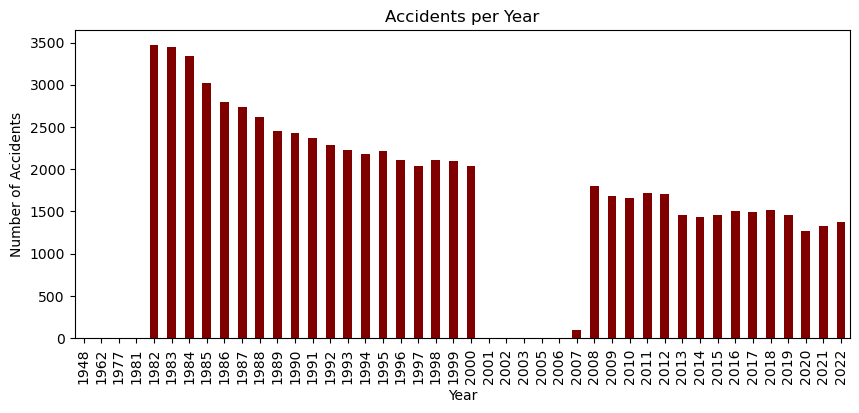

In [4]:
#Categorize and plot accidents per year
df['Year'] = df['Event.Date'].dt.year

accidents_per_year = df['Year'].value_counts().sort_index()
accidents_per_year.plot(kind='bar',figsize=(10, 4), title='Accidents per Year', color='Maroon')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()


We can clearly see that the number of aviation accidents has gone down over the years. Back in the early to mid 80s (1982-1985), there were around 3000 to 3500 accidents per year but in recent years (2020 to 2022) that number has dropped and navigates between 1000 and 1500. That’s a significant decrease, which means aviation has gotten safer.
There is also a drop between 2001 and 2006 where the number of accidents suddenly falls to single or double digits but that’s most likely due to missing or incomplete data during those years.

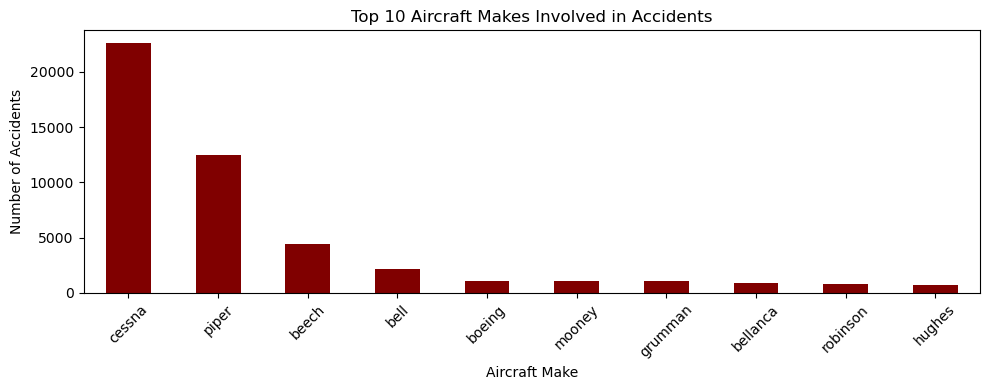

In [5]:
#Top 10 aircraft makes involved in accidents
df['Make'].value_counts().head(10).plot(kind='bar', figsize=(10, 4), color='Maroon')
plt.title('Top 10 Aircraft Makes Involved in Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Looking at the chart, it’s clear that a few aircraft manufacturers show up a lot more than others in the accident records: Cessna is by far the most common, followed by Piper, Beech, and others. This doesn’t automatically mean they’re less safe (could mean they're the most used) but it's important for risk evaluation since we’re trying to decide which types of aircraft are safer to invest in.

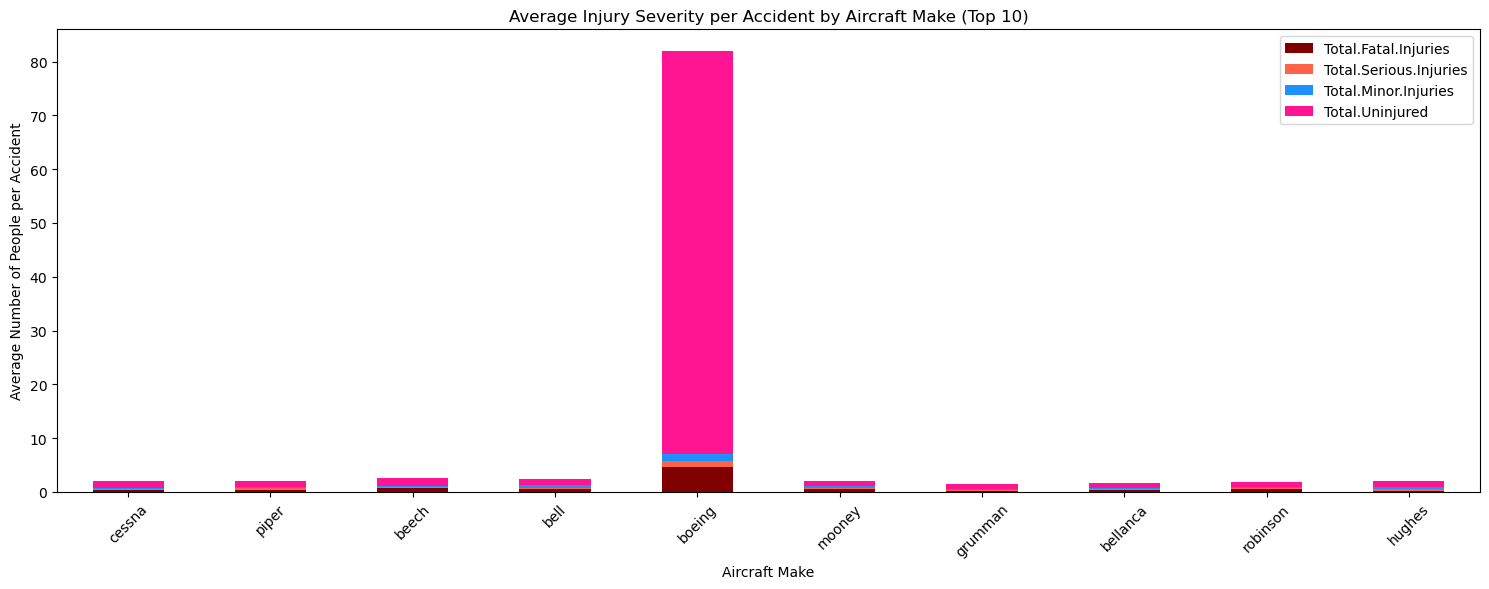

In [6]:
#Average Injury severity by make
#Injury columns to analyze
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
               'Total.Minor.Injuries', 'Total.Uninjured']

#Calculate the average injuries per accident per make
injury_by_make_avg = df.groupby('Make')[injury_cols].mean()

#Focus on the top 10 most common aircraft makes
top_10_makes = df['Make'].value_counts().head(10).index
injury_by_make_avg_top = injury_by_make_avg.loc[top_10_makes]

#Plot
ax = injury_by_make_avg_top.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 6),
    color=['maroon', 'tomato', 'dodgerblue', 'deeppink']
)

plt.title('Average Injury Severity per Accident by Aircraft Make (Top 10)')
plt.xlabel('Aircraft Make')
plt.ylabel('Average Number of People per Accident')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that Boeing stands out in terms of average injuries per accident. While most of the other top aircraft manufacturers show low averages across all injury categories, Boeing’s numbers are significantly higher. On average, each Boeing accident involves around 80 people, most of whom are uninjured but with a non-negligible portion suffering fatal or serious injuries.
So while Boeing may not have a high number of total accidents, the impact per accident is greater.

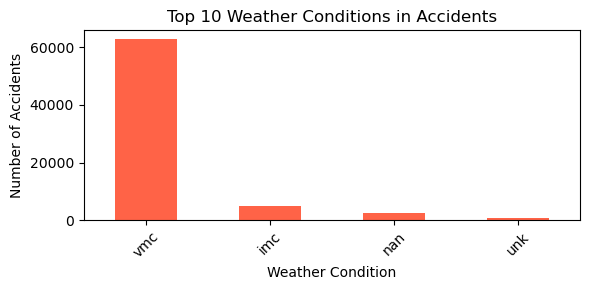

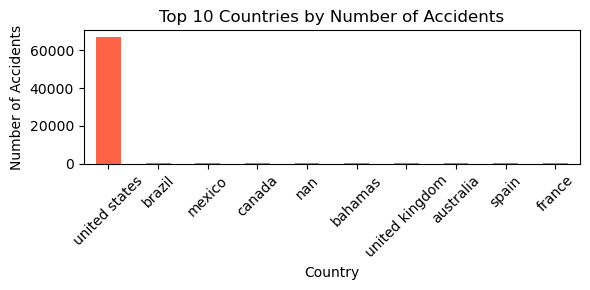

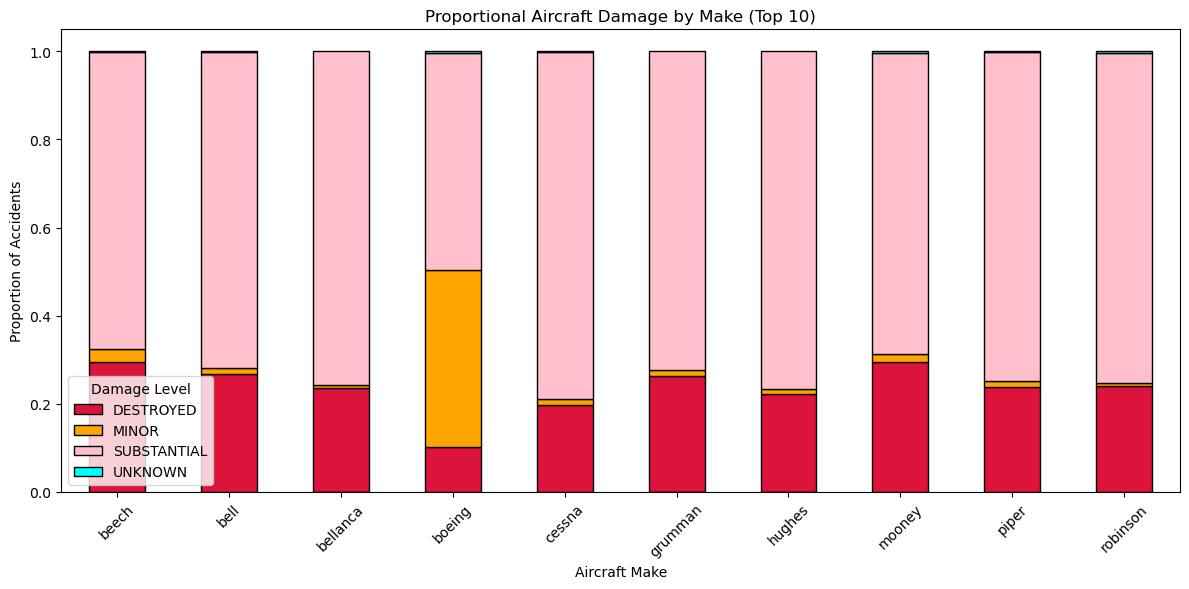

In [7]:
#Weather conditions in accidents
df['Weather.Condition'].value_counts().head(10).plot(kind='bar', color='Tomato', figsize=(6, 3))
plt.title('Top 10 Weather Conditions in Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Most affected countries
df['Country'].value_counts().head(10).plot(kind='bar', color='Tomato', figsize=(6, 3))
plt.title('Top 10 Countries by Number of Accidents')
plt.xlabel('Country')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Aircraft damage
#Clean damage data
df['Aircraft.damage'] = df['Aircraft.damage'].astype(str).str.strip().str.upper()

#focus on top 10 makes
top_10_makes = df['Make'].value_counts().head(10).index
df_top10 = df[df['Make'].isin(top_10_makes)]

#Count damage types per make, then normalize (to get proportions)
damage_by_make = df_top10.groupby(['Make', 'Aircraft.damage']).size().unstack(fill_value=0)
damage_by_make_prop = damage_by_make.div(damage_by_make.sum(axis=1), axis=0)

#plot
damage_by_make_prop.plot(kind='bar', stacked=True, figsize=(12, 6),
                         color=['crimson', 'orange', 'pink', 'cyan'], edgecolor='black')

plt.title('Proportional Aircraft Damage by Make (Top 10)')
plt.xlabel('Aircraft Make')
plt.ylabel('Proportion of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Damage Level')
plt.tight_layout()
plt.show()


These final charts provide a clearer view of where and under what conditions accidents tend to occur. Most accidents happen in clear weather, which is self explanatory since flights tend to be posponed or cancelled in bad weathers meaning less possibilities for accidents. Those accidents in clear weather suggest human or mechanical error. The U.S. dominates the accident count, likely due to higher flight volume. And overall, most aircraft makes tend to suffer substantial or minor damage in accidents. However, the severity varies by make: Beech, Bell, Grumman, Mooney have the highest proportions of destroyed damage, making them the most risky in terms of accident severity. Bellanca, Hughes, Piper, Robinson fall into a moderate risk category, with a mix of substantial and destroyed outcomes. Boeing and Cessna appear to be the least risky, showing lower proportions of destroyed damage and, in Boeing’s case, a notable share of minor incidents.


### Business Recommendation 1

Cessna and Piper have the most accidents, but they’re generally low in severity (fewer injuries and less aircraft destruction). Their high numbers likely reflect how common they are rather than poor safety. Survival rates are solid, making them good picks for revenue with manageable risk.

Boeing on the other hand shows up less often but with much higher stakes (more people involved and more serious outcomes per accident). Even if the planes aren’t always destroyed, the impact is major. It’s a high-risk option unless the company can afford a heavy safety, regulatory, and financial load

### Business Recommendation 2

Beech and Grumman fall into a moderate risk zone. Beech is pretty balanced across injuries and damage, making it a solid middle ground choice. Grumman has low injury rates but a bit more severe damage, so it’s still manageable if the aircraft fits the company's needs.
Bell shows higher severity in both injuries and damage likeliness, it represents a risky investment.

### Business Recommendation 3

Many other makes have few accidents and low injury numbers, but limited data makes it hard to judge their safety profile with confidence. They could be a good opportunity but we need a closer look  before making a call.

## Conclusion

This exploratory data analysis of aviation accidents has helped uncover critical insights into aircraft makes, injury severity, and accident outcomes that will help the company in its choice.

### Next Steps

We recommend the company to conduct a similar study on cost, efficiency, and maintenance that they'll use in order to compare safety with profitability. 